<a href="https://colab.research.google.com/github/hubsukalp/Machine-Learning_Lab/blob/main/ML_Experiment_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [9]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
# Build ANN model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train model
history = model.fit(X_train, y_train, epochs=10,
                    batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8264 - loss: 0.6195 - val_accuracy: 0.9480 - val_loss: 0.1700
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9566 - loss: 0.1490 - val_accuracy: 0.9637 - val_loss: 0.1256
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9699 - loss: 0.1002 - val_accuracy: 0.9692 - val_loss: 0.1015
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9779 - loss: 0.0734 - val_accuracy: 0.9727 - val_loss: 0.0885
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9819 - loss: 0.0591 - val_accuracy: 0.9740 - val_loss: 0.0843
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9866 - loss: 0.0448 - val_accuracy: 0.9745 - val_loss: 0.0783
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9893 - loss: 0.0356 - val_accuracy: 0.9775 - val_loss: 0.0767
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9916 - loss: 0.0281 - val_accuracy: 0.

In [15]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Test Accuracy: 97.70%


In [16]:
# Display sample prediction
predictions = model.predict(X_test[:9])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


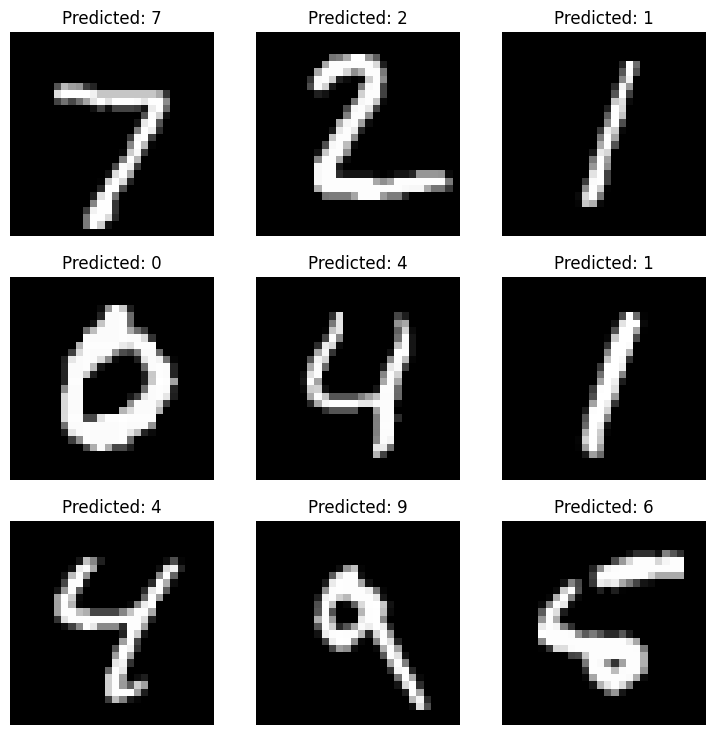

In [17]:
plt.figure(figsize=(9,9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()